# Univariate statistics and hypothesis testing

## Principles


Mass univariate statistical analysis: explore association betweens pairs of variable. 

- In statistics, a **categorical variable** or a **factor** is a variable that can take on one of a limited, and usually fixed, number of possible values, thus assigning each individual to a particular group or "category. The levels are the possibles values of the variable. Number of level = 2, binomial, Number of level > 2: multinomial. There is no intrinsic ordering to the categories.  For example, gender is a categorical variable having two categories (male and female) and there is no intrinsic ordering to the categories.  Hair color is also a categorical variable having a number of categories (blonde, brown, brunette, red, etc.) and again, there is no agreed way to order these from highest to lowest.  A purely categorical variable is one that simply allows you to assign categories but you cannot clearly order the variables.  If the variable has a clear ordering, then that variable would be an ordinal variable, as described below.

- An **Ordinal variable** is similar to a categorical variable.  The difference between the two is that there is a clear ordering of the variables.  For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high.

- A **continuous** or **quantitative variable** $x \in R$ is one that can take any value in a range of possible values possibly infinite.  Eg.: Salary, Experience in years.

- **An independent variable (IV)** is exactly what it sounds like. It is a variable that stands alone and isn't changed by the other variables you are trying to measure. For example, someone's age might be an independent variable. Other factors (such as what they eat, how much they go to school, how much television they watch) aren't going to change a person's age. In fact, when you are looking for some kind of relationship between variables you are trying to see if the independent variable causes some kind of change in the other variables, or dependent variables.

- A **dependent variable** is exactly what it sounds like. It is something that depends on other factors. For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got the night before you took the test, or even how hungry you were when you took it. Usually when you are looking for a relationship between two things you are trying to find out what makes the dependent variable change the way it does.

To explore the association between $y$ dependant variable (eg. Salary) and $x$ the independant (eg.: Experience is quantitative) variable:

### Data model

1. Do some **hypothesis** eg.: Salaray is a linear function of the Experience.

2. build a **model** of your data.

$$
y_i = x_i \beta + \beta_0 + \epsilon_i
$$

- $\beta$: the slope or coeficient or parameter of the model

- $\beta_0$: the **intercept** or bias is the second parameter of the model

- $\epsilon_i$: is the ith error, or residual.


3. **Fit** the model to your data. Estimate $\beta and \beta_0$

4. **Test** your model. 


### What statistical analysis should I use?

http://www.ats.ucla.edu/stat/mult_pkg/whatstat/

## Statistics with scipy: one independant variable (IV)

###  Simple linear regression (IV continuous)

y=491.486913 x + 13584.043803  r:0.538886, r-squared:0.290398, p-value:0.000112, std_err:115.823381


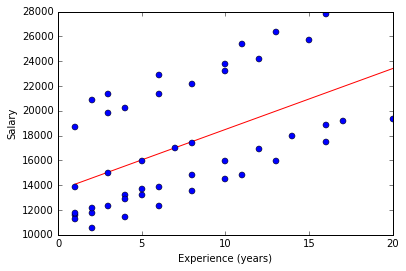

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'ftp://ftp.cea.fr/pub/unati/people/educhesnay/pylearn_doc/data/salary_table.csv'
salary = pd.read_csv(url)
salary.E = salary.E.map({1:'Bachelor', 2:'Master', 3:'Ph.D'})
salary.M = salary.M.map({0:'N', 1:'Y'})

## Outcome
## S: salaries for IT staff in a corporation.

## Predictors:
## X: experience (years)
## E: education (1=Bachelor's, 2=Master's, 3=Ph.D)
## M: management (1=management, 0=not management)


from scipy import stats
import numpy as np
y, x = salary.S, salary.X
beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)
print "y=%f x + %f  r:%f, r-squared:%f, p-value:%f, std_err:%f" % (beta, beta0, r_value, r_value**2, p_value, std_err)

# plotting the line
yhat = beta * x  +  beta0 # regression line
plt.plot(x, yhat, 'r-', x, y,'o')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

#### Goodness of fit

The goodness of fit of a statistical model describes how well it fits a set of observations. Measures of goodness of fit typically summarize the discrepancy between observed values and the values expected under the model in question. We will consider the **explained variance**  also known as the coefficient of determination, denoted $R^2$ pronounced **R-squared**.

The SS total ($SS_\text{tot}$) = SS explained by the regression ($SS_\text{reg}$) + SS of residuals unexplained by the regression ($SS_\text{res}$):

$$ SS_\text{tot} = SS_\text{reg} + SS_\text{res}$$
![title](images/Coefficient_of_Determination.png)

$$\bar{y} = \frac{1}{n}\sum_i y_i $$

Errors obtained with intercept only: the total sum of squares:

$$ SS_\text{tot}=\sum_i (y_i-\bar{y})^2$$


The regression sum of squares, also called the explained sum of squares. 

$$SS_\text{reg}=\sum_i (\hat{y_i} -\bar{y})^2$$
Where $\hat{y_i} = \beta x_i + \beta_0$ is the estimated value of salary $\hat{y_i}$ given a value of experience $x_i$.

The sum of squares of residuals, also called the residual sum of squares (RSS):

$$SS_\text{res}=\sum_i (y_i - \hat{y_i})^2$$ also called 

$R^2$ is the explained variance $\equiv$ the variance explain by the regression / total variance

$$R^2 \equiv \frac{SS_\text{reg}}{SS_{tot}} = 1 - {SS_{res}\over SS_{tot}}.$$

#####  Statistical hypothesis testing

A statistical hypothesis is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables. The test models is compared as an alternative to an idealized null hypothesis that proposes no relationship between two data sets. The comparison is deemed statistically significant if the relationship between the data sets would be an unlikely realization of the null hypothesis according to a threshold probability—the significance level. Hypothesis tests are used in determining what outcomes of a study would lead to a rejection of the null hypothesis for a pre-specified level of significance. The process of distinguishing between the null hypothesis and the alternative hypothesis is aided by identifying two conceptual types of errors (type 1 & type 2), and by specifying parametric limits on e.g. how much type 1 error will be permitted.

Here null hypothesis assume that the slope is null ($\beta = 0$). Which means that data are explained with the intercept only. Then compare errors obtains with using the mean versus errors of the regression model.

Compare errors obtained with intercept only versus errors of the full linear model. Partition of variance using of sums of squares SS:

**The F-test** The Fisher test

Comapre the residual sum of squares of two models, 1 and 2, where model 1 is 'nested' within model 2. Model 1 is the Restricted model, and Model 2 is the Unrestricted one. That is, model 1 has $p1$ parameters, and model 2 has $p2$ parameters, where $p2 > p1$. The model with more parameters will always be able to fit the data at least as well as the model with fewer parameters. Thus typically model 2 will give a better (i.e. lower error) fit to the data than model 1. But one often wants to determine whether model 2 gives a significantly better fit to the data.

If there are $n$ data points to estimate parameters of both models from, then one can calculate the F statistic, given by

$$
    F=\frac{\left(\frac{\text{RSS}_1 - \text{RSS}_2 }{p_2 - p_1}\right)}{\left(\frac{\text{RSS}_2}{n - p_2 + 1}\right)} ,
$$

where RSSi is the residual sum of squares of model i. Under the null hypothesis that model 2 does not provide a significantly better fit than model 1, F will have an F distribution, with ($p2−p1, n−p2+1$) degrees of freedom. The null hypothesis is rejected if the F calculated from the data is greater than the critical value of the F-distribution for some desired false-rejection probability (e.g. 0.05).

In our case: $\text{RSS}_1=SS_\text{tot}$, $\text{RSS}_2 = SS_\text{res}$, $p_1=1$, $p_2=2$. 

## Exercise: partition of variance formula.

Compute:

- $\bar{y}$ `y_mu`

- $SS_\text{tot}$: `ss_tot`

- $SS_\text{reg}$: `ss_reg`

- $SS_\text{res}$: `ss_res`

- Check partition of variance formula based on SS using `assert np.allclose(val1, val2, atol=1e-05)`

- What np.allclose does?

- What assert does?

- What is it worth for

- Compute $R^2$ and compare with `r_value` above

- Compute F score

- Compute the p-value

###  One sample t-test (no IV)

###  Two sample t-test  (IV categorial with nb level = 2)

http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm

###  Anova F-test  (IV categorial with nb level > 2)

###  One sample t-test (no IV)

###  Two sample t-test  (IV categorial with nb level = 2)

## Introduction to statmodels: one or more independant variables